- *Sinh viên làm trực tiếp vào file này, thêm code vào những chỗ TODO*
- *Ouput đúng được đính kèm.*
- Trong bài này các plot có thể khác style một chút, nhưng nội dung hiển thị phải giống.
- Chỉ dùng `matplotlib`, không dùng thêm thư viện vẽ hình khác.

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
# Đọc Dataframe từ file csv, với các cột như sau
field_names = ['Region', 'Country', 'HIV Treatment Rate', 
               'GNI per capita (USD)', 'GDP growth (annual %)',
               'Adult literacy rate','GDP per capita growth']
world_df = pd.read_csv('Data/world_data.csv',skiprows=1,names=field_names)
world_df

,Region,Country,HIV Treatment Rate,GNI per capita (USD),GDP growth (annual %),Adult literacy rate,GDP per capita growth
0,Latin America & Caribbean,Aruba,NaN,24840.0,-18.589099,97.989998,-18.698324
1,South Asia,Afghanistan,10.75,500.0,-2.351101,37.266041,-5.364666
2,Sub-Saharan Africa,Angola,33.50,1690.0,-5.638215,69.215057,-8.672432
3,Europe & Central Asia,Albania,48.00,5270.0,-3.302082,98.500000,-2.745239
4,Europe & Central Asia,Andorra,NaN,NaN,-11.183940,NaN,-12.735078
...,...,...,...,...,...,...,...
213,Middle East & North Africa,"Yemen, Rep.",29.25,NaN,NaN,NaN,NaN
214,Sub-Saharan Africa,South Africa,72.75,6090.0,-6.342471,92.115764,-7.481093
215,Sub-Saharan Africa,Zambia,84.50,1130.0,-2.785055,87.500000,-5.595733
216,Sub-Saharan Africa,Zimbabwe,87.75,1460.0,-7.816951,89.271709,-9.670405


In [142]:
world_df['GNI per capita (USD)'] = pd.to_numeric(world_df['GNI per capita (USD)'], errors='coerce')
world_df['GDP growth (annual %)'] = pd.to_numeric(world_df['GDP growth (annual %)'], errors='coerce')
world_df['Adult literacy rate'] = pd.to_numeric(world_df['Adult literacy rate'], errors='coerce')

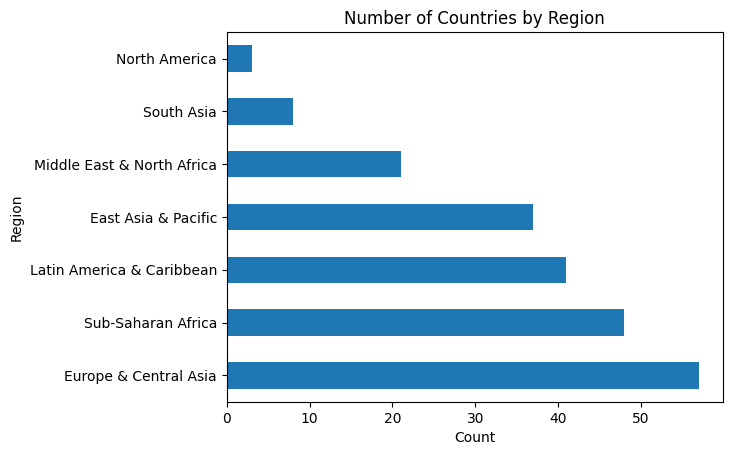

In [143]:
# Vẽ barplot cho các Region
world_df['Region'].value_counts().plot(kind='barh')
plt.title('Number of Countries by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()


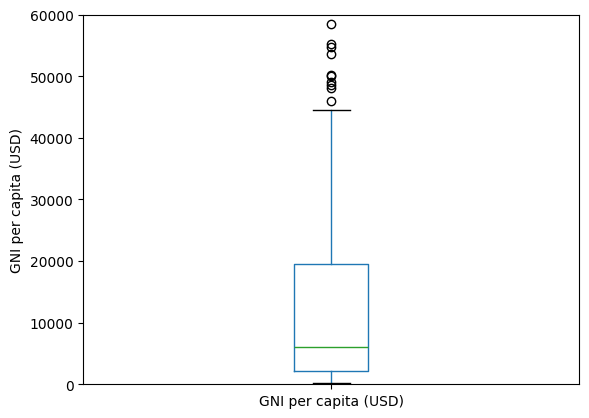

In [144]:
# Vẽ boxplot cho 'GNI per capita (USD)'
world_df.boxplot(column='GNI per capita (USD)')
plt.ylabel('GNI per capita (USD)')
plt.ylim(0, 60000)
plt.grid(False)
plt.show()



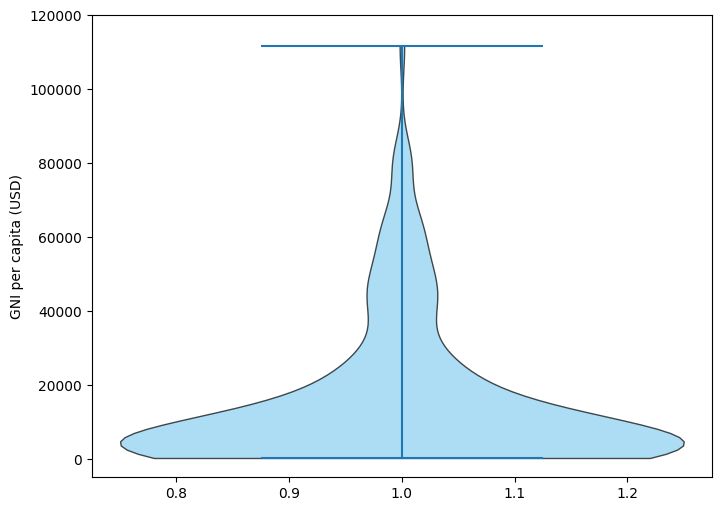

In [145]:
# Vẽ violinplot cho 'GNI per capita (USD)'
fig, ax = plt.subplots(figsize=(8, 6))
parts = ax.violinplot(world_df['GNI per capita (USD)'].dropna(), vert=True, showmeans=False)

for pc in parts['bodies']:
    pc.set_facecolor('#89CFF0')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)


ax.set_ylabel('GNI per capita (USD)')
ax.set_ylim(-5000, 120000)
plt.show()




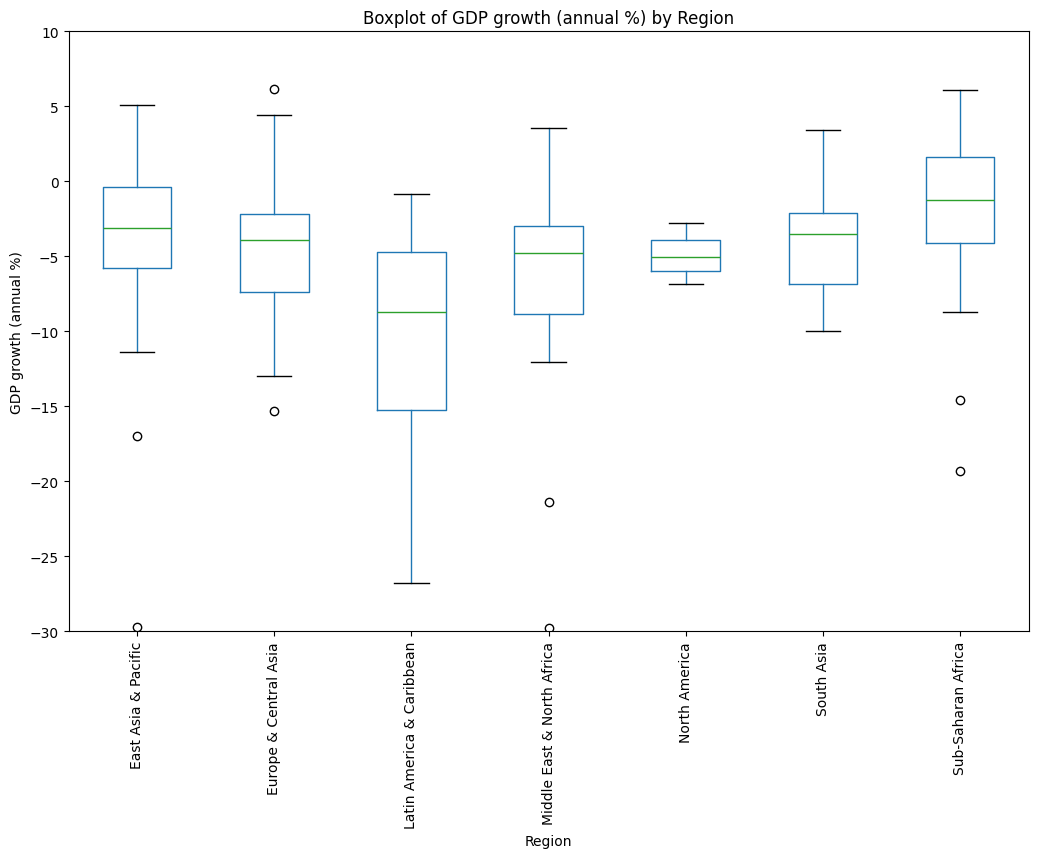

In [146]:
# Vẽ boxplot của 'GDP growth (annual %)' thuộc các Region lên cùng một biểu đồ
fig, ax = plt.subplots(figsize=(12, 8))
world_df.boxplot(column='GDP growth (annual %)', by='Region', ax=ax)
plt.title('Boxplot of GDP growth (annual %) by Region')
plt.suptitle('')
plt.xlabel('Region')
plt.ylabel('GDP growth (annual %)')
plt.ylim(-30, 10)

# Xoay nhãn của các quốc gia theo chiều dọc
plt.xticks(rotation=90, ha='center')
plt.grid(False)
# Hiển thị biểu đồ
plt.show()



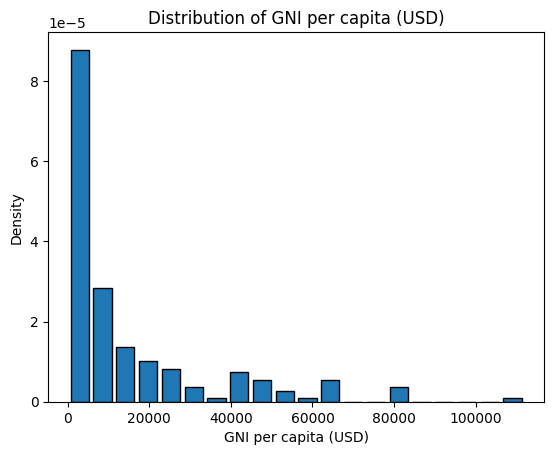

In [147]:
# Vẽ histogram của 'GNI per capita (USD)'
plt.hist(world_df['GNI per capita (USD)'].dropna(), bins=20, edgecolor='black', rwidth=0.8, density=True)
plt.title('Distribution of GNI per capita (USD)')
plt.xlabel('GNI per capita (USD)')
plt.ylabel('Density')
plt.show()



Gọi các vùng sau là bán cầu bắc (Northern)
- 'Europe & Central Asia'
- 'North America'
- 'East Asia & Pacific'
  
Gọi các vùng sau là bán cầu nam (Southern)
- 'Sub-Saharan Africa'
- 'Middle East & North Africa'
- 'South Asia'
- 'Latin America & Caribbean'

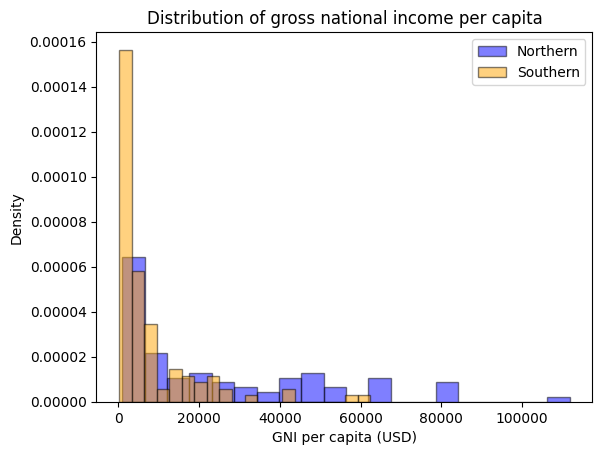

In [148]:
# Hãy vẽ 2 histogram thể hiện sự phân bố của cột 'GNI per capita (USD)'
# cho bán cầu bắc và bán cầu nam lên cùng một bản đồ
north_hemisphere = world_df[world_df['Region'].isin(['Europe & Central Asia', 'North America', 'East Asia & Pacific'])]
south_hemisphere = world_df[world_df['Region'].isin(['Sub-Saharan Africa', 'Middle East & North Africa', 'South Asia', 'Latin America & Caribbean'])]

# Vẽ 2 histogram cho bán cầu Bắc và bán cầu Nam
plt.hist(north_hemisphere['GNI per capita (USD)'].dropna(), bins=20, alpha=0.5, label='Northern', color='blue', density=True, edgecolor='black')
plt.hist(south_hemisphere['GNI per capita (USD)'].dropna(), bins=20, alpha=0.5, label='Southern', color='orange', density=True, edgecolor='black')
plt.title('Distribution of gross national income per capita')
plt.xlabel('GNI per capita (USD)')
plt.ylabel('Density')
plt.legend(loc='upper right')

plt.show()


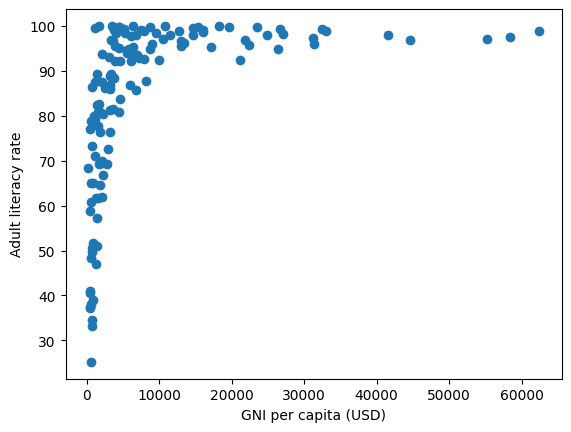

In [149]:
# Hãy vẽ scatter plot thể hiện mối quan hệ giữa
#'GNI per capita (USD)' và 'Adult literacy rate'
plt.scatter(world_df['GNI per capita (USD)'], world_df['Adult literacy rate'])
plt.xlabel('GNI per capita (USD)')
plt.ylabel('Adult literacy rate')
plt.show()


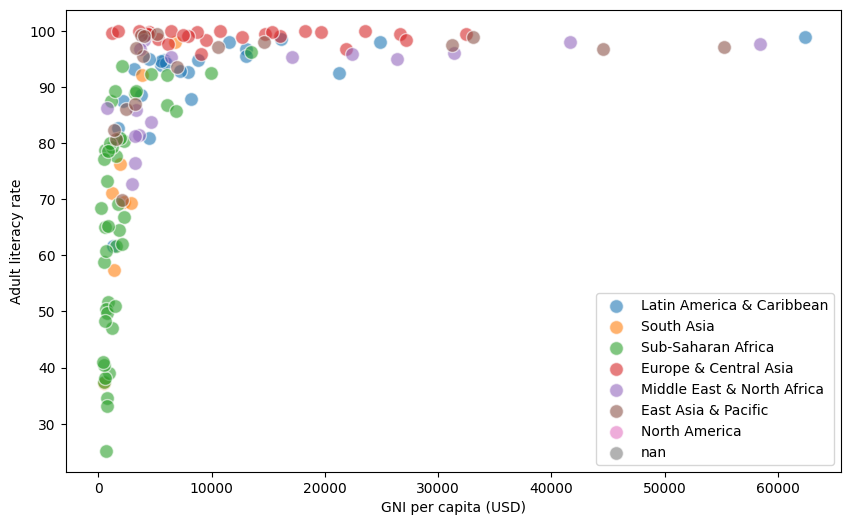

In [150]:
# Hãy vẽ scatter plot thể hiện mối quan hệ giữa
#'GNI per capita (USD)' và 'Adult literacy rate'
# cho mỗi Region với màu khác nhau

# Lấy danh sách các Region
regions = world_df['Region'].unique()

# Tạo một bảng màu cho các Region
colors = plt.cm.tab10(range(len(regions)))

# Vẽ scatter plot
plt.figure(figsize=(10, 6))
for region, color in zip(regions, colors):
    subset = world_df[world_df['Region'] == region]
    plt.scatter(subset['GNI per capita (USD)'], subset['Adult literacy rate'], label=region, color=color, alpha=0.6, edgecolors='w', s=100)

plt.xlabel('GNI per capita (USD)')
plt.ylabel('Adult literacy rate')
plt.legend(loc='best')
plt.grid(False)
plt.show()



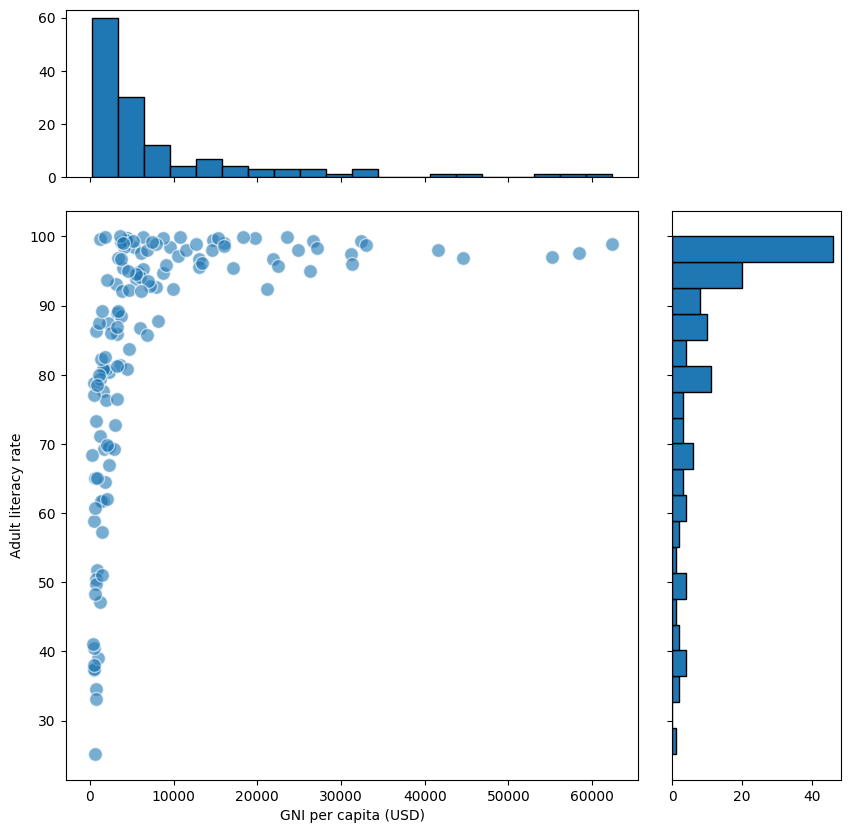

In [151]:
# Hãy vẽ scatter plot thể hiện mối quan hệ giữa
#'GNI per capita (USD)' và 'Adult literacy rate'
# Cùng với hai histogram ở hai trục
from matplotlib.gridspec import GridSpec

filtered_df = world_df.dropna(subset=['GNI per capita (USD)', 'Adult literacy rate'])

# Tạo layout cho biểu đồ
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 4, figure=fig)

# Scatter plot
ax_scatter = fig.add_subplot(gs[1:4, 0:3])
ax_scatter.scatter(filtered_df['GNI per capita (USD)'], filtered_df['Adult literacy rate'], alpha=0.6, edgecolors='w', s=100)
ax_scatter.set_xlabel('GNI per capita (USD)')
ax_scatter.set_ylabel('Adult literacy rate')

# Histogram trên trục x
ax_histx = fig.add_subplot(gs[0, 0: 3], sharex=ax_scatter)
ax_histx.hist(filtered_df['GNI per capita (USD)'], bins=20, edgecolor='black')

# Histogram trên trục y
ax_histy = fig.add_subplot(gs[1:4, 3], sharey=ax_scatter)
ax_histy.hist(filtered_df['Adult literacy rate'], bins=20, orientation='horizontal', edgecolor='black')

# Ẩn nhãn của các histogram
plt.setp(ax_histx.get_xticklabels(), visible=False)
plt.setp(ax_histy.get_yticklabels(), visible=False)

plt.show()


